# Measures of spread 

In [1]:
import pandas as pd
import numpy as np
 

# Price of a single slice of pizza collected from restaurants in the city of New York and the country of Seneca in New York State

In [2]:
nyc = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,15,15,15,20,40,60,78,120]
seneca = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,3,5,15,2,4,6,8,12]
d = {
     'nyc': nyc,
     'seneca' : seneca
    }
 
us_pizza = pd.DataFrame(d)
us_pizza

,nyc,seneca
0,1,1
1,1,1
2,2,2
3,2,2
4,3,3
5,3,3
6,4,4
7,4,4
8,4,4
9,4,4


# Finding the mean prices of Pizza in 2 different cities 

In [3]:
us_pizza.mean()

nyc       17.833333
seneca     5.000000
dtype: float64

# Finding the median price of pizza 

In [4]:
us_pizza.median()

nyc       5.5
seneca    4.0
dtype: float64

# Finding the most commonly priced  pizza (MODE)

In [5]:
us_pizza.mode()

,nyc,seneca
0,4,4


# Which city has a bigger variance (a wide range of prices to purchase a pizza)

In [6]:
us_pizza.std() # We are calculating the standard deviation (which is square root of variance)

nyc       29.082591
seneca     3.296902
dtype: float64

In [7]:
# Note :Its obvious that the spread of pizza price is higher in the city of NY

# Finding the interquartile range of the columnar data from the NYC data frame 


In [8]:
q1=us_pizza['nyc'].quantile(0.25) # finding the lower quartile value 
q3=us_pizza['nyc'].quantile(0.75) # finding the upper quartile value 
iqr = q3-q1  # Calculating the inter quartile range
print("Inter Quartile Range = ",iqr)
# Note : 1.5 times the IQR is the treshold value to find the outliers 
upf = q3+(1.5*iqr) 
lwf = q1-(1.5*iqr)
print("upper fence = ",upf)
print("lower fence = ",lwf)

Inter Quartile Range =  11.25
upper fence =  31.875
lower fence =  -13.125


In [9]:
# Any data points above and below the upper and lower fence qualify for being outliers in general ! 

# How to check for the presence of outliers in the given data using box plots?

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

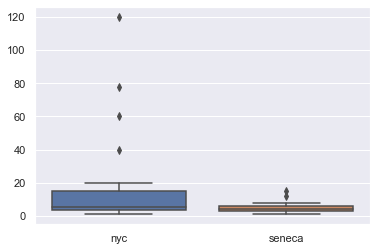

<Figure size 432x288 with 0 Axes>

In [11]:
# Plotting the box plots for all the columns in the us_pizza data frame 
sns.boxplot(data=us_pizza)
plt.show()
plt.clf()

# How to obtain the outliers data values for NYC column ? 

array([ 40,  60,  78, 120], dtype=int64)

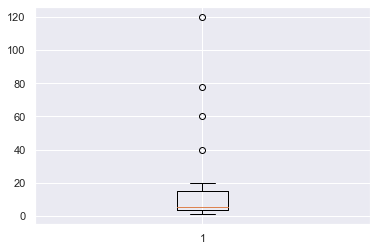

In [12]:
nybox = plt.boxplot(us_pizza['nyc'])
#plt.boxplot(us_pizza)
nyout = nybox['fliers'][0]
nyout.get_data()[1]

# Working on the campus placement report data set 

In [13]:
campus = pd.read_csv('Placement_Data_Full_Class.csv')
campus.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [14]:
campus['salary'].mean()

288655.4054054054

In [15]:
campus['salary'].median()

265000.0

In [16]:
campus['salary'].mode()

0    300000.0
dtype: float64

In [17]:
campus['salary'].max()

940000.0

In [18]:
campus['salary'].min()

200000.0

# In class exercise : 
Find the precence of outliers (if any) on this salary column using the box plots. Print the outlier values. 

# Working with the US super store data 


In [22]:
df = pd.read_excel('US Superstore data.xls')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Comparing the standard deviations of the profit column and the quantity column 

In [20]:
print('Standard Deviation for Profit:',np.std(df['Profit'], axis=0))
print('Standard Deviation for Quantity:',np.std(df['Quantity'], axis=0))

Standard Deviation for Profit: 234.2483873603591
Standard Deviation for Quantity: 2.224998366078636


# Justify if its a good idea to compare the std of any arbitary columns which are not relatable for analysis purposes ? 

# Finding the IQR for the profits column 

In [21]:
from scipy.stats import iqr
iqr(df['Profit'],axis=0, interpolation='higher')

27.632999999999996

# In class exercise :
Check if there are outliers in the Profit column 

# What is the use of identifying outliers in the profilt column ? Do we always ignore the outliers ? 

In this case, outliers (the items which are highly profitable needs more attention) Outlier analysis is to be dealt case-on-case basis. 

# Sampling 

In [23]:
# df already has the US uper Store data loaded into it 
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


 # Obtaing a random sample 

In [29]:
newdf = df.sample(frac = .30, random_state=21) # We are obtaining a sample of 30% of the original data 

In [32]:
newdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8865,8866,CA-2015-158148,2015-12-20,2015-12-26,Standard Class,JM-15865,John Murray,Consumer,United States,Arlington,...,22204,South,OFF-AP-10003281,Office Supplies,Appliances,Acco 6 Outlet Guardian Standard Surge Suppressor,36.270,3,0.0,10.8810
4049,4050,CA-2017-136350,2017-06-24,2017-06-26,Second Class,GA-14515,George Ashbrook,Consumer,United States,New York City,...,10011,East,FUR-FU-10003601,Furniture,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",276.690,3,0.0,49.8042
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
7505,7506,US-2017-106579,2017-06-08,2017-06-13,Standard Class,BW-11200,Ben Wallace,Consumer,United States,Skokie,...,60076,Central,OFF-BI-10000309,Office Supplies,Binders,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",12.176,4,0.8,-18.8728
2102,2103,CA-2014-123295,2014-07-18,2014-07-18,Same Day,AH-10120,Adrian Hane,Home Office,United States,Tucson,...,85705,West,FUR-CH-10002372,Furniture,Chairs,Office Star - Ergonomically Designed Knee Chair,259.136,4,0.2,-25.9136


# Practice exercise 

1) Obtain a stratified random sampling on the above data using the Segment column, i.e each segment can be considered as a strata  

Hint : Create multiple data frames by filtering based on each segment. Obtain a simple random sample from each of the dataframes
and create a new data frame by appending the results obtained. 